# Software Engineering for Economists

## Background

Software Engineering is an important component of Scientific Computing. The task in scientific computing is the verification, validation, and uncertainty quantification of computational models.

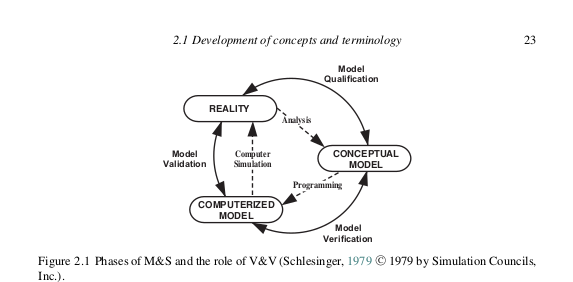

In [1]:
from IPython.display import Image
Image(filename='images/conceptual_model.png')

*Software Engineering* is part of the verification step.

## Running Example

We will work with a simple example. Here is the utility function.

$$ u(x) = x^\alpha$$, where $\alpha, x > 0$.

The returns are drawn from a lognormal distribution with mean $\mu$ and standard deviation $\sigma$. So, we can calculate the expected utility as:

$$U(x) = \int^{-\infty}_{\infty} x^\alpha f(x)$$.




In [2]:
# SciPy Stack
import numpy as np


def get_expected_utility(alpha, mean, sd):
    """ Get the expected returns by drawing numerous
    random deviates from a lognormal distribution.
    """
    # Guard interface
    assert (isinstance(mean, float))
    assert (isinstance(sd, float))
    assert (isinstance(alpha, float))
    assert (sd >= 0.00)
    assert (alpha >= 0.00)
    
    # Set parametrization for Monte Carlo 
    # integration.
    num_draws = 10000000
    
    # Draw ten-thousand deviates from the 
    deviates = get_random_deviates(mean, sd, num_draws)
    
    # Calculate the average utility from all deviates.
    rslt = np.mean(deviates ** alpha)
    
    # Check result
    assert (isinstance(rslt, float))
        
    # Finishing
    return rslt


def get_random_deviates(mean, sd, num_draws):
    """ Get random deviates from a lognormal 
    distribution.
    """
    # Draw deviates from lognormal distribution.
    deviates = []
    for _ in range(num_draws):
        deviate = np.random.lognormal(mean, sd)
        deviates += [deviate]
    
    # Type Conversion
    deviates = np.array(deviates)
    
    # Finishing
    return deviates

## Version Control

## Unit Tests

In [3]:
def generate_random_request():
    """ Generate a random admissible request.
    """
    # Draw random deviates that honor the suppert
    # constraints.
    mean = np.random.normal()
    alpha, sd = np.random.uniform(size=2)

    # Finishing
    return alpha, mean, sd

So let us check whether our function runs for some admissible values.

In [5]:
# Generate and evaluate a random request.
alpha, mean, sd = generate_random_request()
rslt = get_expected_utility(alpha, mean, sd)
# Print out request and result
print('Request: {0:.3f}, {1:.3f}, {2:.3f}  Result: {3:.3f}'.format(alpha, mean, sd, rslt))

Request: 0.235, 0.483, 0.862  Result: 1.143


Let us define some basic tests that partly embody some of our previous knowledge about the result.

In [6]:
def test_random_requests():
    """ Draw a whole host of random requests to 
    ensure that the function works for all admissible 
    values.
    """    
    for _ in range(5):
        # Get expected returns.
        alpha, mean, sd = generate_random_request()
        get_expected_utility(alpha, mean, sd)


def test_results():
    """ Test some previous knowledge about the results.
    """
    for _ in range(5):
        # Get expected returns.
        alpha, mean, sd = generate_random_request()
        rslt = get_expected_utility(alpha, mean, sd)
        # Assertions
        assert rslt > 0   


def test_closed_form():
    """ Test the simulated result against the closed 
    form solution in the special case of linear utility.
    """
    for _ in range(1):
        _, mean, sd = generate_random_request()
        alpha = 1.0
        # Get expected returns using simulation.
        simulated = get_expected_utility(alpha, mean, sd)
        # Get expected returns using closed form.
        closed = np.exp(mean + (sd ** 2) * 0.5)
        # Assertions. Note the small number of decimal points
        # required. Given the precision of the Monte Carlo integration
        # this test if bound to fail sometimes.
        np.testing.assert_almost_equal(closed, simulated, decimal=3)

In principle, we can now run our tests one-by-one.

In [10]:
test_random_requests()

test_results()

test_closed_form()

How about test automation? Let us now run our test battery in the terminal. See our repository [here](https://github.com/softEcon/talks/blob/master/ZICE/software_engineering/tests.py) for the script. We are using [*py.test*](http://pytest.org), here. As usual, several alternatives exist: (1) [*nose*](https://nose.readthedocs.org/en/latest/), (2) [unittest](https://docs.python.org/2/library/unittest.html#module-unittest).

In [8]:
%%bash
py.test --verbose tests.py

============================= test session starts ==============================
platform linux2 -- Python 2.7.10, pytest-2.8.5, py-1.4.31, pluggy-0.3.1 -- /home/peisenha/.envs/softEcon/bin/python
cachedir: .cache
rootdir: /home/peisenha/Dropbox/@office/teaching/lectures/softEcon/talks/ZICE/software_engineering, inifile: 
collecting ... collected 3 items

tests.py::test_random_requests PASSED
tests.py::test_results PASSED
tests.py::test_closed_form PASSED

========================== 3 passed in 56.51 seconds ===========================


## Code Review

There are several tools out there that I found useful in the past: (1) [*QuantifiedCode*](https://www.quantifiedcode.com/) and (2) [*Codacy*](https://www.codacy.com). Let us visit *QuantifiedCode* online and take a look around.

In [ ]:
from IPython.display import Image
Image(filename='images/quantifiedcode.png')

## Profiling

In [ ]:
from IPython.display import Image
Image(filename='images/runsnake.png')

## References

* Oberkampf

* Schlesinger 1979 from conceptual model

***Formatting***

In [9]:
import urllib; from IPython.core.display import HTML
HTML(urllib.urlopen('http://bit.ly/1K5apRH').read())